<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [2]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'


fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode="r"), 'lxml')

<ipython-input-2-b1a847eff678>:8: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode="r"), 'lxml')


In [3]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [9]:
# manipule os dados
nome=[]
sigla=[]
regiao=[]

tabela  = fonte.find("body")
for linha in tabela.find_all("estado"):
    textos_coluna = list()

for coluna in fonte.find_all("nome"):
      textos_coluna = coluna.get_text(";").strip().split(";")
      nome.append(textos_coluna)
for coluna in fonte.find_all("sigla"):
      textos_coluna = coluna.get_text(";").strip().split(";")
      sigla.append(textos_coluna)
for coluna in fonte.find_all("regiao"):
      textos_coluna = coluna.get_text(";").strip().split(";")
      regiao.append(textos_coluna)


arquivo_limpo = {"UF":nome,
                 "sigla":sigla,
                 "regiao":regiao
}

In [10]:
print(arquivo_limpo)

{'UF': [['ACRE'], ['ALAGOAS'], ['AMAPA'], ['AMAZONAS'], ['BAHIA'], ['CEARA'], ['DISTRITO FEDERAL'], ['ESPIRITO SANTO'], ['GOIAS'], ['MARANHAO'], ['MATO GROSSO'], ['MATO GROSSO DO SUL'], ['PARA'], ['PARAIBA'], ['PARANA'], ['PERNAMBUCO'], ['PIAUI'], ['RIO DE JANEIRO'], ['RIO GRANDE DO NORTE'], ['RIO GRANDE DO SUL'], ['RONDONIA'], ['RORAIMA'], ['SANTA CATARINA'], ['SAO PAULO'], ['SERGIPE'], ['TOCANTINS'], ['MINAS GERAIS']], 'sigla': [['AC'], ['AL'], ['AP'], ['AM'], ['BA'], ['CE'], ['DF'], ['ES'], ['GO'], ['MA'], ['MT'], ['MS'], ['PA'], ['PB'], ['PR'], ['PE'], ['PI'], ['RJ'], ['RN'], ['RS'], ['RO'], ['RR'], ['SC'], ['SP'], ['SE'], ['TO'], ['MG']], 'regiao': [['NORTE'], ['NORDESTE'], ['NORTE'], ['NORTE'], ['NORDESTE'], ['NORDESTE'], ['CENTRO-OESTE'], ['SUDESTE'], ['CENTRO-OESTE'], ['NORDESTE'], ['CENTRO-OESTE'], ['CENTRO-OESTE'], ['NORTE'], ['NORDESTE'], ['SUL'], ['NORDESTE'], ['NORDESTE'], ['SUDESTE'], ['NORDESTE'], ['SUL'], ['NORTE'], ['NORTE'], ['SUL'], ['SUDESTE'], ['NORDESTE'], ['NORTE

In [11]:
import re

for key, value in arquivo_limpo.items():
  for i in range(len(value)):
    arquivo_limpo[key][i] = re.sub(r'\[|\]|\'', '', str(value[i]))

print(arquivo_limpo)


{'UF': ['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS'], 'sigla': ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG'], 'regiao': ['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']}


In [8]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'


with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';') #obs: não consegui abrir o arquivo com ; mas consegui com ,
  coluna = ["UF","sigla","regiao"]
  linha = zip(*[arquivo_limpo[col] for col in coluna])

  escritor_csv.writerow(coluna)
  for linha in linha:
    escritor_csv.writerow(linha)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

In [ ]:
# visualize os resultados
fonte.head()
# continue o codigo aqui

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [ ]:
# manipule os dados
dfal=fonte.query("Censo==2010.0")
df_limpo=dfal[["UF", "nome", "PIB", "Pop_est_2009", "PIB_percapita"]]

df_limpo["UF"]=df_limpo["UF"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

<ipython-input-11-40cbd61ecdd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo["UF"]=df_limpo["UF"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [ ]:
df_limpo.head()

In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'
df_limpo.to_csv(NOME_ARQUIVO_DESTINO,sep=";")


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3

dfe=pd.read_csv("estados-limpo.csv",sep=";")

dfc=pd.read_csv("cidades-limpo.csv",sep=";")



In [ ]:
dfeo=dfe

dfe["UF"]=dfeo["UF"].str.replace("[","")
dfe["UF"]=dfeo["UF"].str.replace("]","")
dfe["UF"]=dfeo["UF"].str.replace("'","")

dfe["sigla"]=dfeo["sigla"].str.replace("[","")
dfe["sigla"]=dfeo["sigla"].str.replace("]","")
dfe["sigla"]=dfeo["sigla"].str.replace("'","")

dfe["regiao"]=dfeo["regiao"].str.replace("[","")
dfe["regiao"]=dfeo["regiao"].str.replace("]","")
dfe["regiao"]=dfeo["regiao"].str.replace("'","")



In [ ]:
dfc=dfc[["UF","nome","PIB","Pop_est_2009","PIB_percapita"]]

In [ ]:

dfl=pd.merge(left=dfc, right=dfe, on='UF', how='inner')
dfl


,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,2.355845e+04,7884,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7.499741e+04,7893,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,9.290382e+04,20668,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,6.236689e+04,19410,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,AMAPA,Serra do Navio,1.097953e+05,3982,27572.900391,AP,NORTE
5551,AMAPA,Ferreira Gomes,6.993773e+04,5475,12774.009766,AP,NORTE
5552,AMAPA,Tartarugalzinho,1.199880e+05,13769,8714.360352,AP,NORTE
5553,AMAPA,Macapá,4.679694e+06,366484,12769.160156,AP,NORTE


In [ ]:
dfl.to_csv("brasil.csv",sep=";")

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1
dfb=pd.read_csv("brasil.csv",sep=";")
dfb=dfb.drop("Unnamed: 0",axis=1)
dfb

,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,2.355845e+04,7884,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7.499741e+04,7893,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,9.290382e+04,20668,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,6.236689e+04,19410,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,AMAPA,Serra do Navio,1.097953e+05,3982,27572.900391,AP,NORTE
5551,AMAPA,Ferreira Gomes,6.993773e+04,5475,12774.009766,AP,NORTE
5552,AMAPA,Tartarugalzinho,1.199880e+05,13769,8714.360352,AP,NORTE
5553,AMAPA,Macapá,4.679694e+06,366484,12769.160156,AP,NORTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta
dfb.sort_values(by="Pop_est_2009",ascending=False).head(10)

,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
3271,SAO PAULO,São Paulo,389317152.0,11037593,35271.929688,SP,SUDESTE
4504,RIO DE JANEIRO,Rio de Janeiro,175739344.0,6186710,28405.949219,RJ,SUDESTE
44,BAHIA,Salvador,32824228.0,2998056,10948.500000,BA,NORDESTE
5554,DISTRITO FEDERAL,Brasília,131487264.0,2606885,50438.460938,DF,CENTRO-OESTE
4221,CEARA,Fortaleza,31789186.0,2505552,12687.500000,CE,NORDESTE
1735,MINAS GERAIS,Belo Horizonte,44595204.0,2452617,18182.699219,MG,SUDESTE
4849,PARANA,Curitiba,45762420.0,1851215,24720.210938,PR,SUL
3720,AMAZONAS,Manaus,40486108.0,1738641,23286.060547,AM,NORTE
2435,PERNAMBUCO,Recife,24835340.0,1561659,15903.179688,PE,NORDESTE
2624,PARA,Belém,16526989.0,1437600,11496.240234,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta
dfb.query("regiao == 'NORDESTE'").sort_values(by="PIB_percapita",ascending=True).head(5)

,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
4464,MARANHAO,São Vicente Ferrer,39492.960938,20463,1929.969971,MA,NORDESTE
4359,MARANHAO,Cajapió,22781.035156,10337,2203.830078,MA,NORDESTE
1848,PIAUI,Dom Inocêncio,25457.230469,10795,2358.239990,PI,NORDESTE
4483,MARANHAO,Timbiras,63724.851562,26909,2368.159912,MA,NORDESTE
4380,MARANHAO,Axixá,36745.226562,15203,2416.969971,MA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
dfb.query("sigla == 'SP'").sort_values(by="PIB",ascending=False).head(15)

,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
3271,SAO PAULO,São Paulo,389317152.0,11037593,35271.929688,SP,SUDESTE
3223,SAO PAULO,Guarulhos,32473828.0,1299283,24993.650391,SP,SUDESTE
3340,SAO PAULO,Campinas,31654720.0,1064669,29731.980469,SP,SUDESTE
3106,SAO PAULO,Osasco,31616452.0,718646,43994.468750,SP,SUDESTE
2810,SAO PAULO,São Bernardo do Campo,28935768.0,810979,35680.050781,SP,SUDESTE
3344,SAO PAULO,Barueri,26908070.0,270173,99595.703125,SP,SUDESTE
2768,SAO PAULO,Santos,22546134.0,417098,54054.761719,SP,SUDESTE
2994,SAO PAULO,São José dos Campos,22018042.0,615871,35751.058594,SP,SUDESTE
3014,SAO PAULO,Jundiaí,16585137.0,349929,47395.718750,SP,SUDESTE
2816,SAO PAULO,Santo André,14709603.0,673396,21843.910156,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
dfb.query("sigla == 'SC'").PIB.sum()

129806256.75195317

 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
dfb.query("regiao == 'SUL'").Pop_est_2009.sum()

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
dfb.query("sigla == 'MS'").PIB_percapita.mean()

14458.896859975644

 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
dfb.Pop_est_2009.sum()

191176146

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: title={'center': '10 cidades menos populosas do Brasil'}, xlabel='Cidades', ylabel='População'>

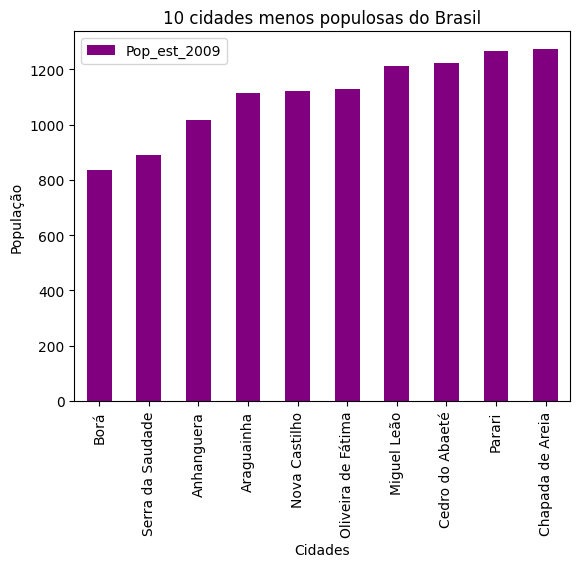

In [ ]:
# código para gerar a visualização

dfb.sort_values(by="Pop_est_2009",ascending=True).head(10).plot.bar(x="nome",y="Pop_est_2009",
                                                                    color="purple",
                                                                    xlabel="Cidades",
                                                                    ylabel="População",
                                                                    title="10 cidades menos populosas do Brasil")


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: title={'center': 'População por região'}>

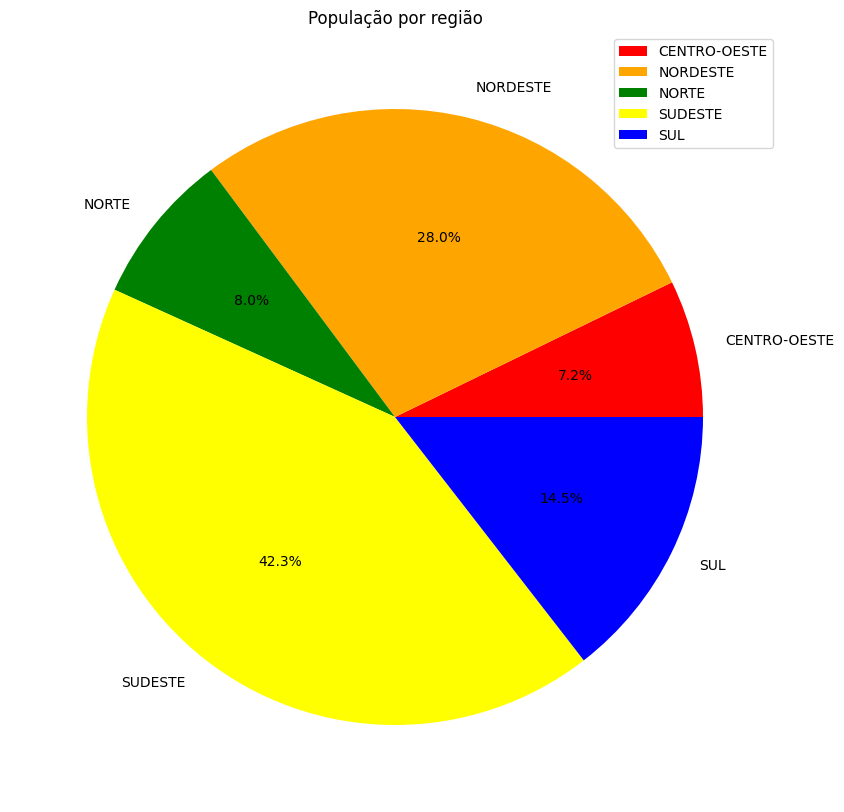

In [ ]:
# código para gerar a visualização
dfb.groupby("regiao").Pop_est_2009.sum().plot.pie(title="População por região",
                                                  autopct="%1.1f%%",
                                                  colors=["red","orange","green","yellow","blue"]
                                                  ,ylabel=""
                                                  ,legend=True
                                                  ,figsize=(10,10))
